In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import Normalizer
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
from sklearn.metrics import r2_score

# Step2


## Understanding Dataset

### 1.Reading File

In [2]:
dt=pd.read_csv("50_Startups.csv")

## 2. Knowing Data

In [3]:
dt.head()

,RandD_Spend,Administration,MarketingSpend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
 dt.columns

Index(['RandD_Spend', 'Administration', 'MarketingSpend', 'State', 'Profit'], dtype='object')

In [5]:
dt.describe()


,RandD_Spend,Administration,MarketingSpend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [6]:
dt.isna().sum()

RandD_Spend       0
Administration    0
MarketingSpend    0
State             0
Profit            0
dtype: int64

In [7]:
#dt.info()

In [8]:
dt.corr()

,RandD_Spend,Administration,MarketingSpend,Profit
RandD_Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
MarketingSpend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


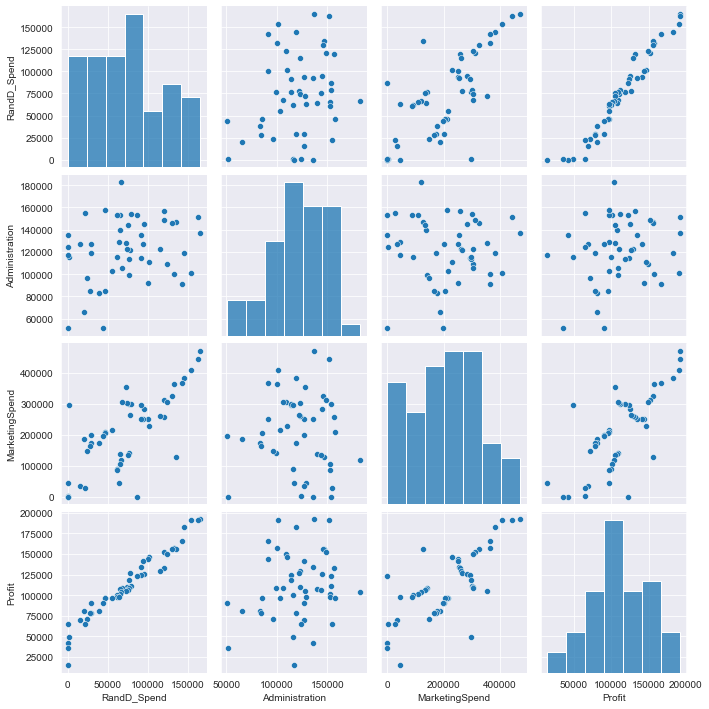

In [9]:
sns.set_style(style='darkgrid')
sns.pairplot(dt)

In [10]:
a = pd.get_dummies(dt['State'],drop_first=True)
a.head()

,Florida,New York
0,0,1
1,0,0
2,1,0
3,0,1
4,1,0


In [11]:
b = dt.drop('State',axis=1)
b.head()

,RandD_Spend,Administration,MarketingSpend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


<AxesSubplot:>

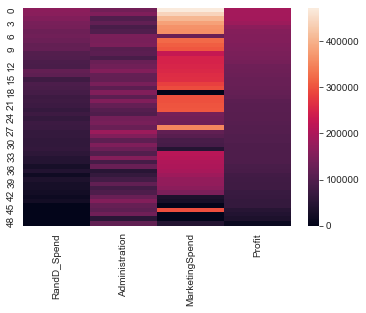

In [12]:
sns.set_style(style='darkgrid')
sns.heatmap(b)

In [13]:
c=pd.concat([a,b],axis=1)
c.head()

,Florida,New York,RandD_Spend,Administration,MarketingSpend,Profit
0,0,1,165349.20,136897.80,471784.10,192261.83
1,0,0,162597.70,151377.59,443898.53,191792.06
2,1,0,153441.51,101145.55,407934.54,191050.39
3,0,1,144372.41,118671.85,383199.62,182901.99
4,1,0,142107.34,91391.77,366168.42,166187.94


In [14]:
dt= c.rename(columns={"New York":"NY","RandD_Spend":'RDS','MarketingSpend':'MS'})
dt.head()

,Florida,NY,RDS,Administration,MS,Profit
0,0,1,165349.20,136897.80,471784.10,192261.83
1,0,0,162597.70,151377.59,443898.53,191792.06
2,1,0,153441.51,101145.55,407934.54,191050.39
3,0,1,144372.41,118671.85,383199.62,182901.99
4,1,0,142107.34,91391.77,366168.42,166187.94


# Step 3

## Build Model

### Using OLS Method without any Transformation

In [15]:
model=smf.ols("Profit~Florida+NY+RDS+Administration+MS",data=dt).fit()
model.params

Intercept         50125.343832
Florida             198.788793
NY                  -41.887019
RDS                   0.806023
Administration       -0.027004
MS                    0.026980
dtype: float64

In [16]:
t = model.tvalues
p = model.pvalues
print("Coefficients = \n"+str(t))
print("\n\np-value = \n"+str(p))

Coefficients = 
Intercept          7.280560
Florida            0.058970
NY                -0.012864
RDS               17.368580
Administration    -0.517012
MS                 1.573889
dtype: float64


p-value = 
Intercept         4.444178e-09
Florida           9.532429e-01
NY                9.897941e-01
RDS               2.578772e-21
Administration    6.077373e-01
MS                1.226769e-01
dtype: float64


In [17]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Tue, 06 Apr 2021   Prob (F-statistic):           1.34e-27
Time:                        11:52:54   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       5.013e+04   6884.820      7.281      0.000    3.62e+04     6.4e+04
Florida          198.7888   3371.007      0.059      0.953   -6595.030    6992.607
NY               -41.8870   3256.039     -0.013      0.990   -6604.003    6520.229
RDS                0.8060      0.046     17.369      0.000       0.712       0.900
Administration    -0.0270      0.052     -0.517      0.608      -0.132       0.078
MS                 0.0270      0.017      1.574      0.123      -0.008       0.062
==============================================================================
Omnibus:                       14.782   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.266
Skew:                          -0.948   Prob(JB):                     2.41e-05
Kurtosis:                       5.572   Cond. No.                     1.45e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.45e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Raw Model Accuracy

In [18]:
A1 = (model.rsquared,model.rsquared_adj)
A1

(0.9507524843355148, 0.945156175737278)

In [19]:
m1_A=smf.ols("Profit~Administration",data=dt).fit()
m1_florida=smf.ols("Profit~Florida",data=dt).fit()
m1_r=smf.ols('Profit~RDS',data=dt).fit()
m1_ms=smf.ols("Profit~MS",data=dt).fit
m1_NY=smf.ols("Profit~NY",data=dt).fit()

In [20]:
m1_r.pvalues,m1_A.pvalues,m1_NY.pvalues,m1_florida.pvalues

(Intercept    2.782697e-24
 RDS          3.500322e-32
 dtype: float64,
 Intercept         0.003824
 Administration    0.162217
 dtype: float64,
 Intercept    1.616581e-20
 NY           8.287963e-01
 dtype: float64,
 Intercept    1.586129e-20
 Florida      4.214479e-01
 dtype: float64)

In [21]:
m1_ms=smf.ols("Profit~MS",data=dt).fit()
print(m1_ms.tvalues,'\n',m1_ms.pvalues)

Intercept    7.808356
MS           7.802657
dtype: float64 
 Intercept    4.294735e-10
MS           4.381073e-10
dtype: float64


# Calculating VIF

In [22]:
rsq_Florida = smf.ols('Florida~NY+RDS+Administration+MS',data=dt).fit().rsquared
vif_Florida=1/(1-rsq_Florida)
rsq_NY = smf.ols('NY~Florida+RDS+Administration+MS',data=dt).fit().rsquared 
vif_NY=1/(1-rsq_NY)
rsq_RDS=smf.ols('RDS~Administration+MS+NY+Florida',data=dt).fit().rsquared
vif_RDS=1/(1-rsq_RDS)
rsq_Administration=smf.ols('Administration~RDS+MS+Florida+NY',data=dt).fit().rsquared
vif_Administration=1/(1-rsq_Administration)
rsq_MS=smf.ols('MS~RDS+Administration+Florida+NY',data=dt).fit().rsquared
vif_MS=1/(1-rsq_MS)
d1={'variables':['Florida','NY','RDS','Administration','MS'],'VIF':[vif_Florida,vif_NY,vif_RDS,vif_Administration,vif_MS]}
vif_frame=pd.DataFrame(d1)
vif_frame

,variables,VIF
0,Florida,1.387641
1,NY,1.335061
2,RDS,2.495511
3,Administration,1.177766
4,MS,2.416797


# Residual Analysis

### TEST for NOrmality of Residuals(Q-Q PLot)

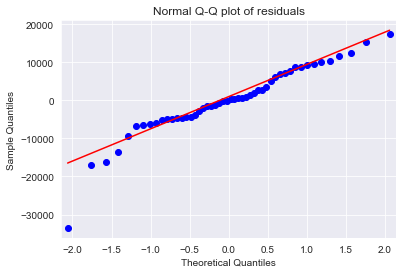

In [23]:
qqplot=sm.qqplot(model.resid,line='q') 
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [24]:
list(np.where(model.resid<-20000))

[array([49], dtype=int64)]

# Residual Plot for Homoscedasticity

In [25]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

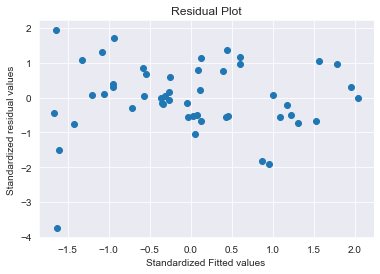

In [26]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

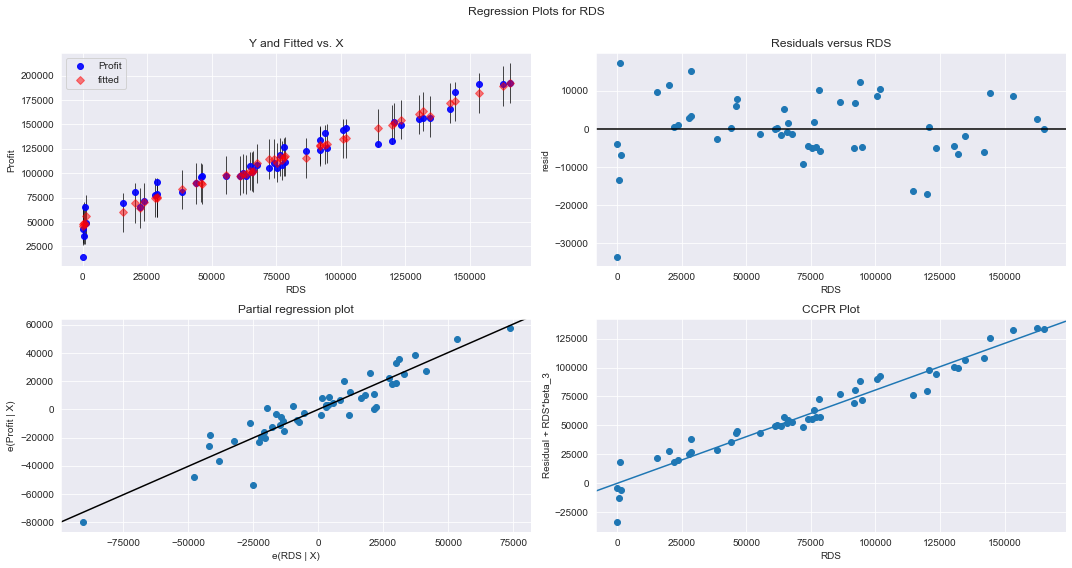

In [27]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "RDS", fig=fig)
plt.show()

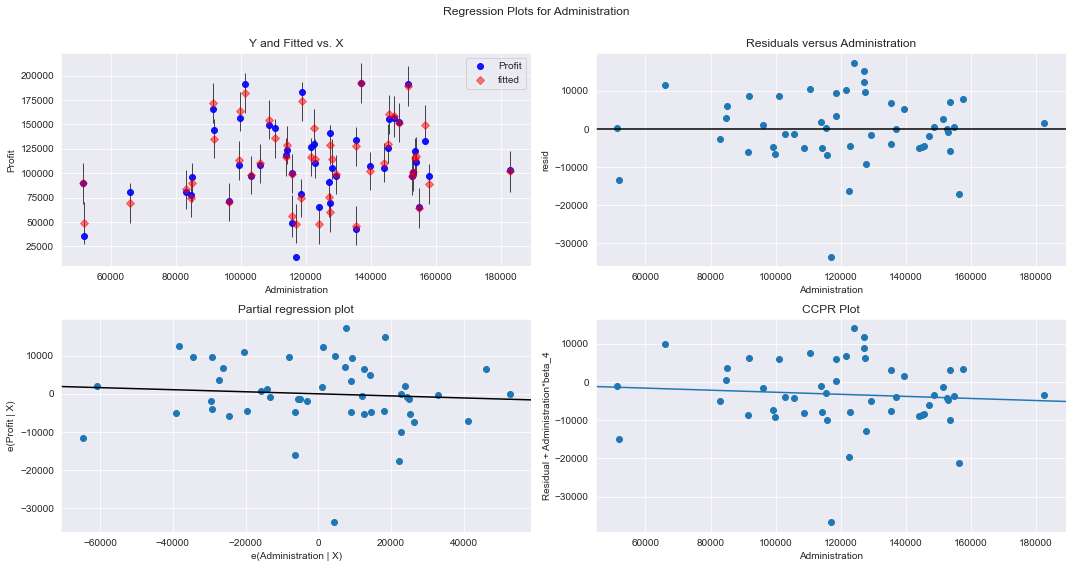

In [28]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Administration", fig=fig)
plt.show()

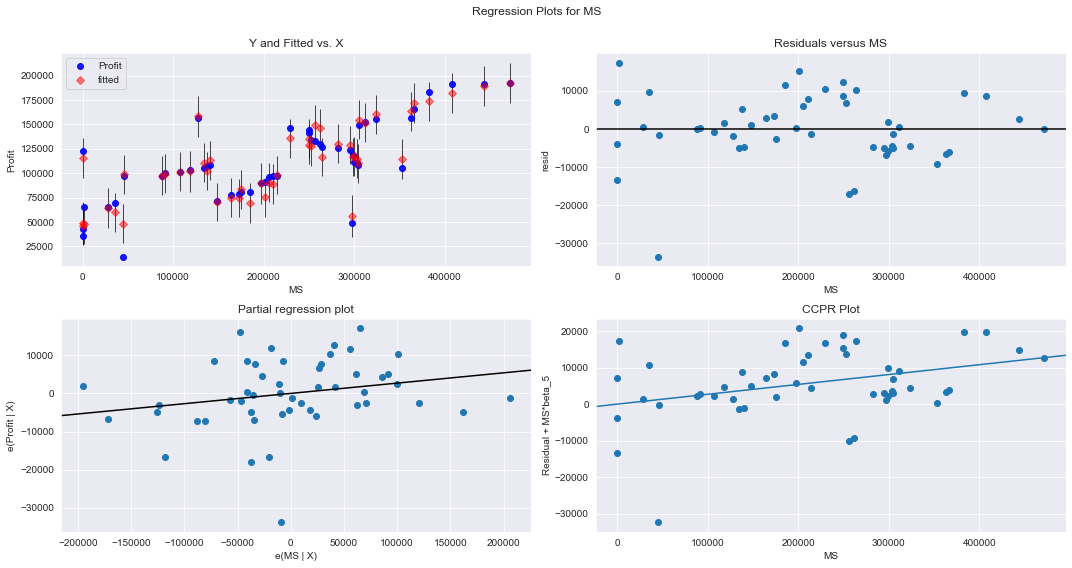

In [29]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "MS", fig=fig)
plt.show()

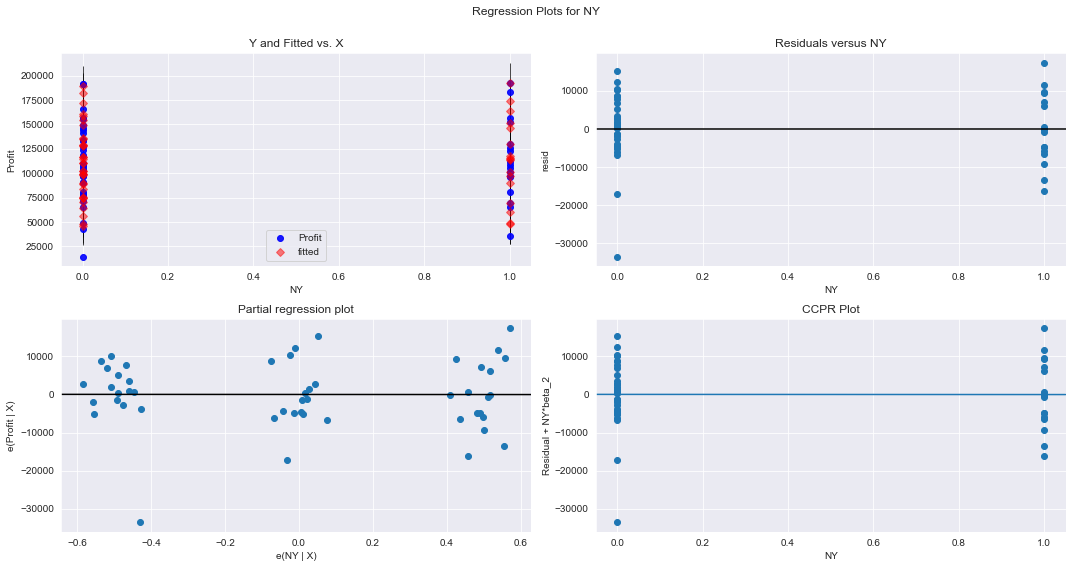

In [30]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "NY", fig=fig)
plt.show()

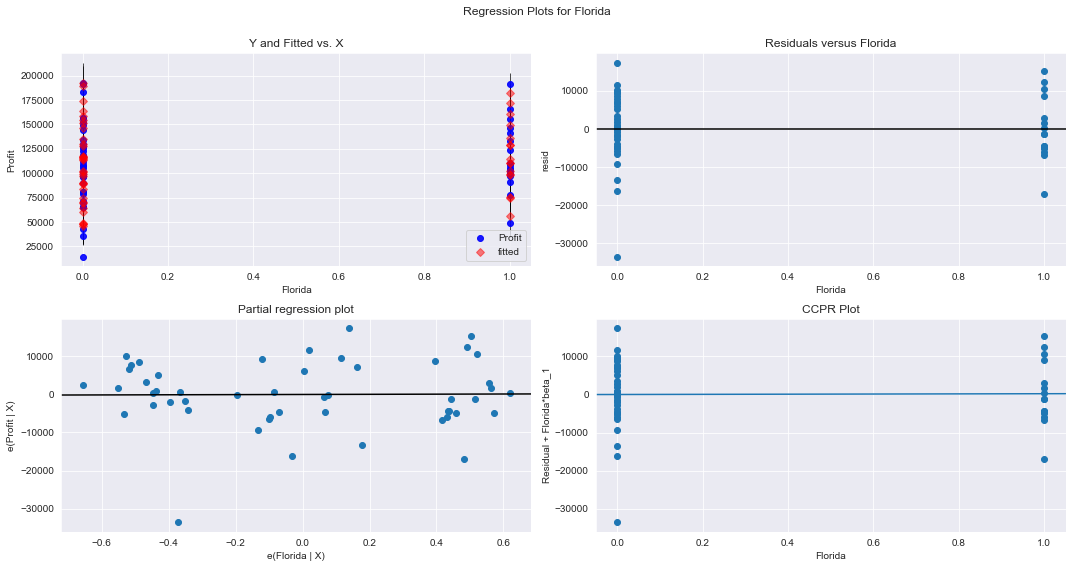

In [31]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Florida", fig=fig)
plt.show()

# Step 4 
## Model Deletion Diagnostic
### Cook's Distance

In [32]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

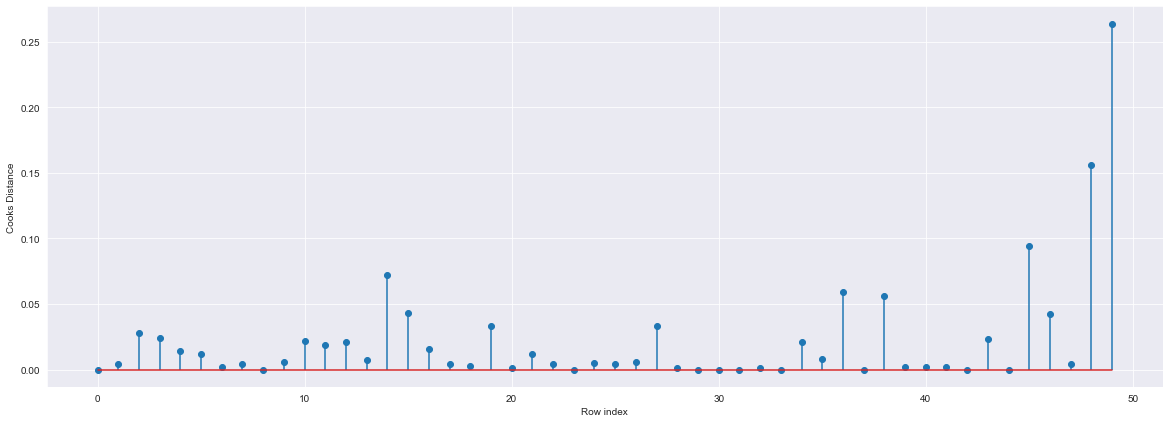

In [33]:
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(dt)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [34]:
(np.argmax(c),np.max(c))

(49, 0.2639594358692202)

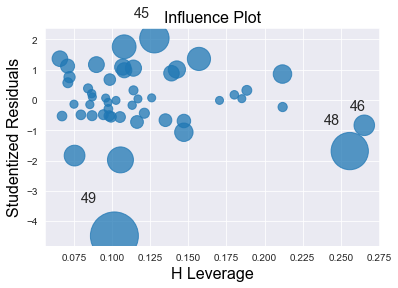

In [35]:
influence_plot(model)
plt.show()

# Improving the Model

In [36]:
k = dt.shape[1]
n = dt.shape[0]
leverage_cutoff = -3*((k + 1)/n)

In [37]:
dt_new = dt.drop(dt.index[[45,46,48,49]],axis=0).reset_index()
dt_new = dt_new.drop(['index'],axis=1)

# Final model building

In [38]:
final_model = smf.ols('Profit~Florida+NY+RDS+Administration+MS',data=dt_new).fit()
final_modelwt=final_model.rsquared
final_model.params

Intercept         57259.700904
Florida            -912.428437
NY                -1744.998960
RDS                   0.773029
Administration       -0.052036
MS                    0.028312
dtype: float64

In [39]:
new_data = pd.DataFrame({'Florida':1,'NY':0,'RDS':142107,'Administration':91391.8,'MS':366168},index=[1])
predictwt = final_model.predict(new_data)
predictwt

1    171811.495683
dtype: float64

# Applying Different Transformation Method
## Method 1: Standardization

In [40]:
dt = pd.read_csv('50_Startups.csv')
a = pd.get_dummies(dt['State'],drop_first=True)
a.head()

,Florida,New York
0,0,1
1,0,0
2,1,0
3,0,1
4,1,0


In [41]:
b=dt.drop('State',axis=1)
b.head()

,RandD_Spend,Administration,MarketingSpend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [42]:
data=b
data.iloc[:,:] = StandardScaler().fit_transform(data.iloc[:,:])
data.head()

,RandD_Spend,Administration,MarketingSpend,Profit
0,2.016411,0.560753,2.153943,2.011203
1,1.955860,1.082807,1.923600,1.999430
2,1.754364,-0.728257,1.626528,1.980842
3,1.554784,-0.096365,1.422210,1.776627
4,1.504937,-1.079919,1.281528,1.357740


In [43]:
c=pd.concat([a,b],axis=1)
c.head()

,Florida,New York,RandD_Spend,Administration,MarketingSpend,Profit
0,0,1,2.016411,0.560753,2.153943,2.011203
1,0,0,1.955860,1.082807,1.923600,1.999430
2,1,0,1.754364,-0.728257,1.626528,1.980842
3,0,1,1.554784,-0.096365,1.422210,1.776627
4,1,0,1.504937,-1.079919,1.281528,1.357740


In [44]:
data = c.rename(columns={"New York":"NY","R&D Spend":"RDS","Marketing Spend":"MS"})
data.head()

,Florida,NY,RandD_Spend,Administration,MarketingSpend,Profit
0,0,1,2.016411,0.560753,2.153943,2.011203
1,0,0,1.955860,1.082807,1.923600,1.999430
2,1,0,1.754364,-0.728257,1.626528,1.980842
3,0,1,1.554784,-0.096365,1.422210,1.776627
4,1,0,1.504937,-1.079919,1.281528,1.357740


In [45]:
data.corr()

,Florida,NY,RandD_Spend,Administration,MarketingSpend,Profit
Florida,1.000000,-0.492366,0.105711,0.010493,0.205685,0.116244
NY,-0.492366,1.000000,0.039068,0.005145,-0.033670,0.031368
RandD_Spend,0.105711,0.039068,1.000000,0.241955,0.724248,0.972900
Administration,0.010493,0.005145,0.241955,1.000000,-0.032154,0.200717
MarketingSpend,0.205685,-0.033670,0.724248,-0.032154,1.000000,0.747766
Profit,0.116244,0.031368,0.972900,0.200717,0.747766,1.000000


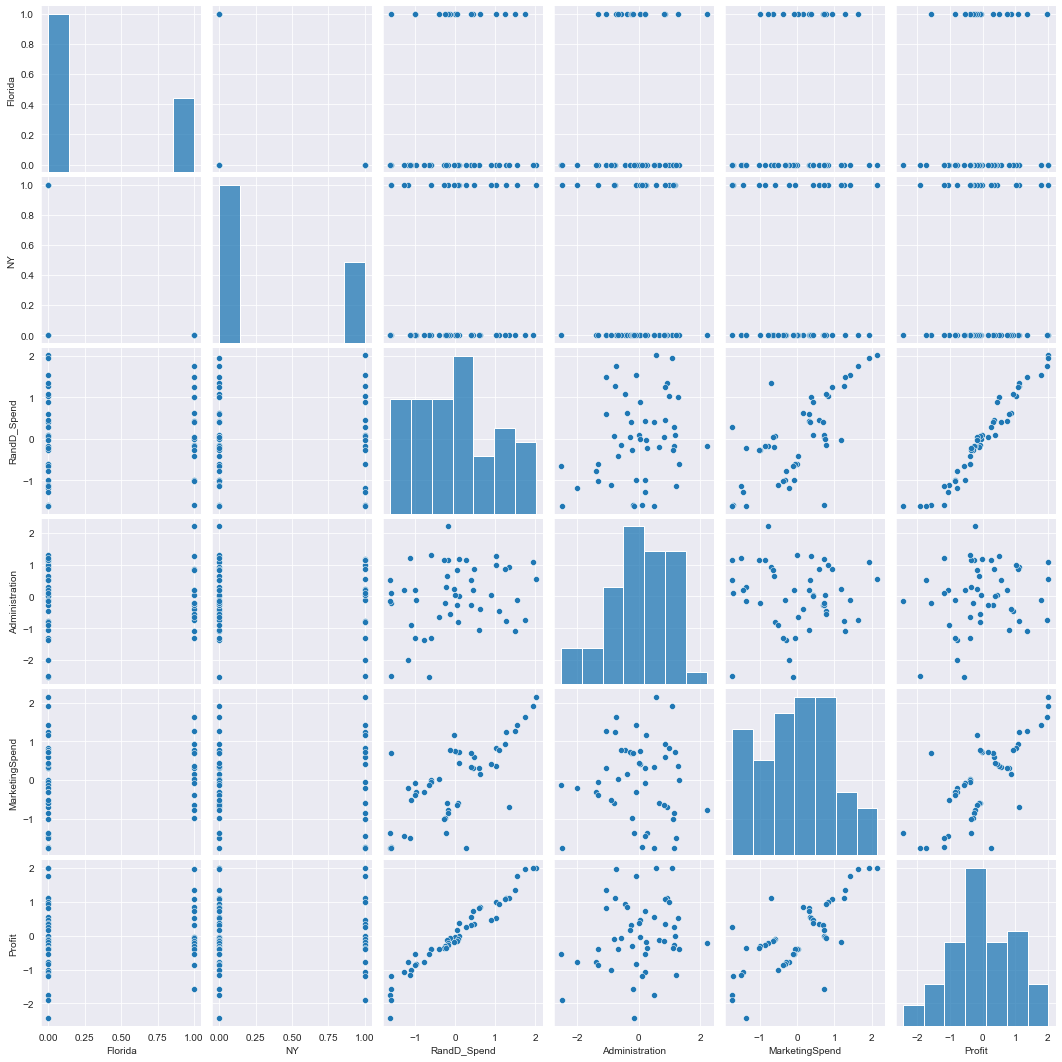

In [46]:
sns.set_style(style='darkgrid')
sns.pairplot(data)

SyntaxError: invalid syntax (<ipython-input-47-393617d9da04>, line 1)

# Build model

In [48]:
model1=smf.ols('Profit~Florida+NY+RandD_Spend+Administration+MarketingSpend',data=data).fit()

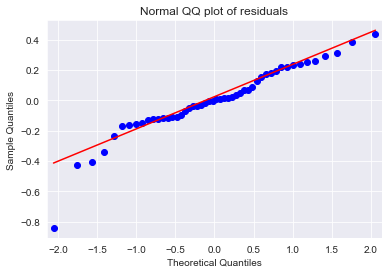

In [49]:
qqplot = sm.qqplot(model1.resid,line='q')
plt.title('Normal QQ plot of residuals')
plt.show()

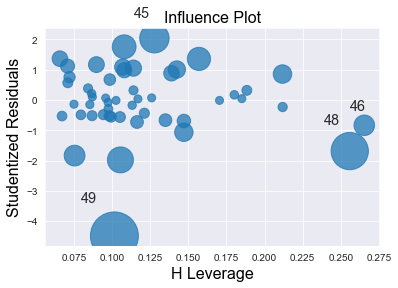

In [50]:
influence_plot(model1)
plt.show()

In [51]:
data_new = data.drop(data.index[[45,46,48,49]],axis=0).reset_index()
data_new = data_new.drop(['index'],axis=1)

# Final Model Building

final_model = smf.ols('Profit~Florida+NY+RandD_Spend+Administration+MarketingSpend',data=data_new).fit()
finalmodel1 = final_model.rsquared

# Predict for given data

new_data = pd.DataFrame({'Florida':1,'NY':0,'RandD_Spend':142107,'Administration':91391.8,'MarketingSpend':366168},index=[1])
predict1 = final_model.predict(new_data)

In [52]:
final_model.params

Intercept         0.047525
Florida          -0.022867
NY               -0.043733
RandD_Spend       0.880356
Administration   -0.036172
MarketingSpend    0.085901
dtype: float64

In [53]:
finalmodel1

0.9629967080989382

In [54]:
predict1

1    153253.009644
dtype: float64

# Method2: Power Transformer

In [55]:
dt = pd.read_csv("50_Startups.csv")

In [56]:
a=pd.get_dummies(dt['State'],drop_first=True)
a.head()

,Florida,New York
0,0,1
1,0,0
2,1,0
3,0,1
4,1,0


In [57]:
b=dt.drop('State',axis=1)
b.head()

,RandD_Spend,Administration,MarketingSpend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [66]:
pt = PowerTransformer(method='yeo-johnson', standardize=True)
skl_yeojohnson = pt.fit(b)
calc_lambdas = skl_yeojohnson.lambdas_
skl_yeojohnson = pt.transform(b)
dt_ptdata = pd.DataFrame(data=skl_yeojohnson, columns=['R&D Spend','Administration','Marketing Spend','Profit'])
dt_ptdata.head()

,R&D Spend,Administration,Marketing Spend,Profit
0,1.562570,0.529102,1.580363,1.987125
1,1.527028,1.131285,1.451634,1.975666
2,1.406784,-0.790378,1.279964,1.957572
3,1.284497,-0.174305,1.157809,1.758577
4,1.253427,-1.106257,1.071572,1.349158


In [67]:
dt_ptdata=pd.concat([a,dt_ptdata],axis=1)
dt_ptdata.head()

,Florida,New York,R&D Spend,Administration,Marketing Spend,Profit
0,0,1,1.562570,0.529102,1.580363,1.987125
1,0,0,1.527028,1.131285,1.451634,1.975666
2,1,0,1.406784,-0.790378,1.279964,1.957572
3,0,1,1.284497,-0.174305,1.157809,1.758577
4,1,0,1.253427,-1.106257,1.071572,1.349158


In [68]:
df_ptdata.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.237386,0.691854,0.960296
Administration,0.237386,1.000000,-0.063801,0.182614
Marketing Spend,0.691854,-0.063801,1.000000,0.700348
Profit,0.960296,0.182614,0.700348,1.000000


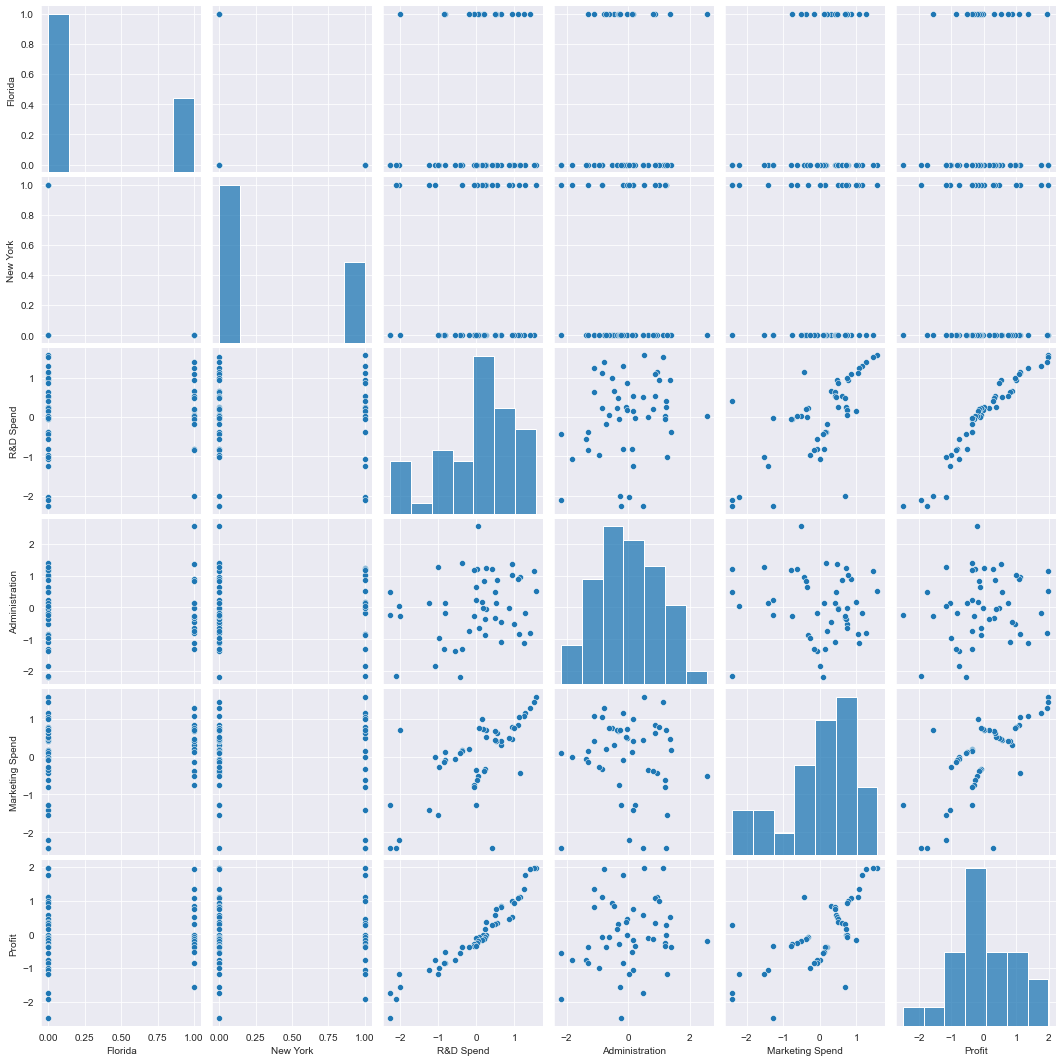

In [69]:
sns.set_style(style='darkgrid')
sns.pairplot(dt_ptdata)

In [73]:
data = dt_ptdata.rename(columns={"New York":"NY","R&D Spend":"RDS","Marketing Spend":"MS"})
data.head()

,Florida,NY,RDS,Administration,MS,Profit
0,0,1,1.562570,0.529102,1.580363,1.987125
1,0,0,1.527028,1.131285,1.451634,1.975666
2,1,0,1.406784,-0.790378,1.279964,1.957572
3,0,1,1.284497,-0.174305,1.157809,1.758577
4,1,0,1.253427,-1.106257,1.071572,1.349158


In [75]:
model2 = smf.ols('Profit~Florida+NY+RDS+Administration+MS',data=data).fit()

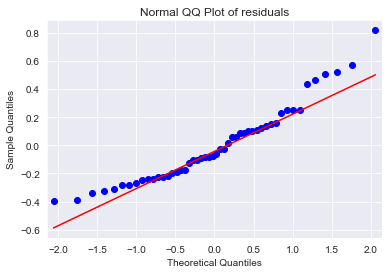

In [76]:
qqplot = sm.qqplot(model2.resid,line = 'q')
plt.title("Normal QQ Plot of residuals")
plt.show()

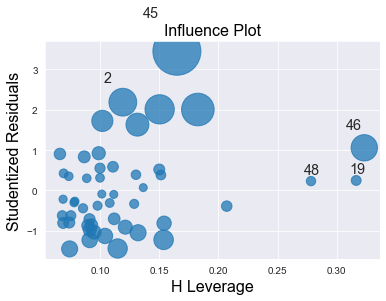

In [77]:
influence_plot(model2)
plt.show()

In [83]:

data_new = data.drop(data.index[[2,45,46,48]],axis=0).reset_index()
data_new = data_new.drop(['index'],axis=1)

# Final Model Building

final_model = smf.ols('Profit~Florida+NY+RDS+Administration+MS',data=data_new).fit()
finalmodel2 = final_model.rsquared

# Predict for given data

new_data = pd.DataFrame({'Florida':1,'NY':0,'RDS':142107,'Administration':91391.8,'MS':366168},index=[1])
predict2 = final_model.predict(new_data)

In [84]:
finalmodel2

0.9372576622771993

In [85]:
predict2

1    162243.625986
dtype: float64

In [86]:
final_model.params

Intercept         0.003959
Florida          -0.100814
NY               -0.052965
RDS               0.979961
Administration   -0.021787
MS                0.068208
dtype: float64

# Quantile Transform

In [87]:
dt=pd.read_csv('50_Startups.csv')

In [91]:
a=pd.get_dummies(dt['State'],drop_first=True)
a.head()

,Florida,New York
0,0,1
1,0,0
2,1,0
3,0,1
4,1,0


In [93]:
b=dt.drop('State',axis=1)
b.head()

,RandD_Spend,Administration,MarketingSpend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [94]:
qt = QuantileTransformer(random_state=0)
qtdf = qt.fit_transform(b)
qtdf = qt.transform(b)
df_qtdata = pd.DataFrame(data=qtdf, columns=['R&D Spend','Administration','Marketing Spend','Profit'])
df_qtdata.head()

C:\Users\Bhavadeep\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2367: UserWarning: n_quantiles (1000) is greater than the total number of samples (50). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


,R&D Spend,Administration,Marketing Spend,Profit
0,1.000000,0.693878,1.000000,1.000000
1,0.979592,0.836735,0.979592,0.979592
2,0.959184,0.224490,0.959184,0.959184
3,0.938776,0.448980,0.938776,0.938776
4,0.918367,0.122449,0.918367,0.918367


In [95]:
df_qtdata = pd.concat([a,df_qtdata],axis=1)
df_qtdata.head()

,Florida,New York,R&D Spend,Administration,Marketing Spend,Profit
0,0,1,1.000000,0.693878,1.000000,1.000000
1,0,0,0.979592,0.836735,0.979592,0.979592
2,1,0,0.959184,0.224490,0.959184,0.959184
3,0,1,0.938776,0.448980,0.938776,0.938776
4,1,0,0.918367,0.122449,0.918367,0.918367


In [96]:
df_qtdata.corr()

,Florida,New York,R&D Spend,Administration,Marketing Spend,Profit
Florida,1.000000,-0.492366,0.110625,-0.080218,0.206453,0.118841
New York,-0.492366,1.000000,0.046236,0.077530,-0.021737,0.024868
R&D Spend,0.110625,0.046236,1.000000,0.191636,0.709263,0.989799
Administration,-0.080218,0.077530,0.191636,1.000000,-0.095773,0.168595
Marketing Spend,0.206453,-0.021737,0.709263,-0.095773,1.000000,0.720297
Profit,0.118841,0.024868,0.989799,0.168595,0.720297,1.000000


In [97]:
data = df_qtdata.rename(columns={"New York":"NY","R&D Spend":"RDS","Marketing Spend":"MS"})
data.head()

,Florida,NY,RDS,Administration,MS,Profit
0,0,1,1.000000,0.693878,1.000000,1.000000
1,0,0,0.979592,0.836735,0.979592,0.979592
2,1,0,0.959184,0.224490,0.959184,0.959184
3,0,1,0.938776,0.448980,0.938776,0.938776
4,1,0,0.918367,0.122449,0.918367,0.918367


# Build Model

In [98]:
model3 = smf.ols('Profit~Florida+NY+RDS+Administration+MS',data=data).fit()

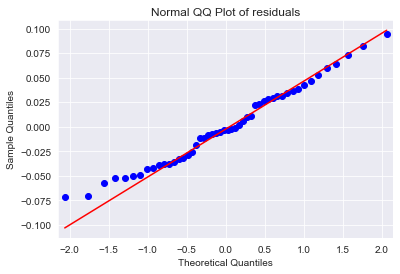

In [99]:
qqplot = sm.qqplot(model3.resid,line = 'q')
plt.title("Normal QQ Plot of residuals")
plt.show()

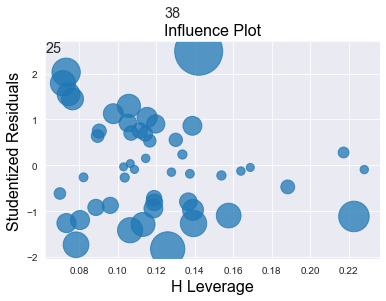

In [100]:
influence_plot(model3)
plt.show()

In [101]:
model_influence = model3.get_influence()
(c,x) = model_influence.cooks_distance

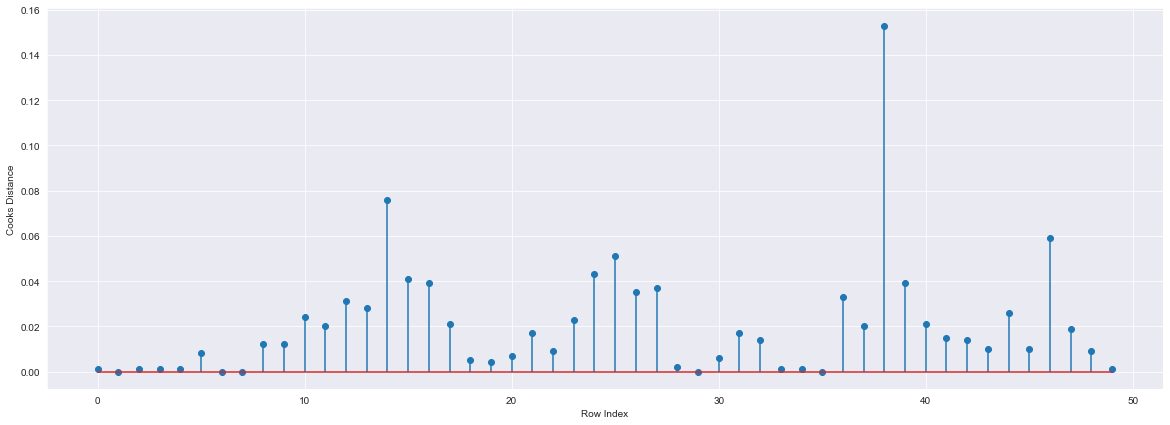

In [103]:
fig = plt.subplots(figsize = (20,7))
plt.stem(np.arange(len(dt)),np.round(c,3))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [104]:
data_new = data.drop(data.index[[14,25,38,46]],axis=0).reset_index()
data_new = data_new.drop(['index'],axis=1)

# Final Model Building

final_model = smf.ols('Profit~Florida+NY+RDS+Administration+MS',data=data_new).fit()
modelqt = final_model.rsquared

# Predict for given data

new_data = pd.DataFrame({'Florida':1,'NY':0,'RDS':142107,'Administration':91391.8,'MS':366168},index=[1])
predict3 = final_model.predict(new_data)

In [105]:
modelqt

0.9858934157374921

In [106]:
final_model.params

Intercept        -0.004833
Florida           0.008680
NY               -0.016349
RDS               0.973350
Administration    0.004242
MS                0.036312
dtype: float64

In [107]:
predict3

1    152003.812286
dtype: float64

# Method 3 : Normalization

In [108]:
dt=pd.read_csv('50_Startups.csv')

In [110]:
a=pd.get_dummies(dt['State'],drop_first=True)
a.head()

,Florida,New York
0,0,1
1,0,0
2,1,0
3,0,1
4,1,0


In [113]:
b=dt.drop('State',axis=1)
b.head()

,RandD_Spend,Administration,MarketingSpend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [117]:
n = Normalizer()
ndt = n.fit_transform(b)
ndt = n.transform(b)
dt_ndata = pd.DataFrame(data=ndt, columns=['RandD_Spend','Administration','MarketingSpend','Profit'])
dt_ndata.head()

,RandD_Spend,Administration,MarketingSpend,Profit
0,0.299093,0.247629,0.853391,0.347775
1,0.305549,0.284464,0.834161,0.360410
2,0.315397,0.207903,0.838503,0.392701
3,0.311201,0.255803,0.826004,0.394254
4,0.325807,0.209532,0.839508,0.381016


In [120]:
dt_ndata=pd.concat([a,dt_ndata],axis=1)
dt_ndata.head()

,Florida,New York,RandD_Spend,Administration,MarketingSpend,Profit
0,0,1,0.299093,0.247629,0.853391,0.347775
1,0,0,0.305549,0.284464,0.834161,0.360410
2,1,0,0.315397,0.207903,0.838503,0.392701
3,0,1,0.311201,0.255803,0.826004,0.394254
4,1,0,0.325807,0.209532,0.839508,0.381016


In [121]:
dt_ndata.corr()

,Florida,New York,RandD_Spend,Administration,MarketingSpend,Profit
Florida,1.000000,-0.492366,0.090983,-0.216427,0.261461,-0.109965
New York,-0.492366,1.000000,0.004907,0.069968,-0.172158,0.182760
RandD_Spend,0.090983,0.004907,1.000000,-0.396416,0.220266,0.497899
Administration,-0.216427,0.069968,-0.396416,1.000000,-0.909188,0.212358
MarketingSpend,0.261461,-0.172158,0.220266,-0.909188,1.000000,-0.447095
Profit,-0.109965,0.182760,0.497899,0.212358,-0.447095,1.000000


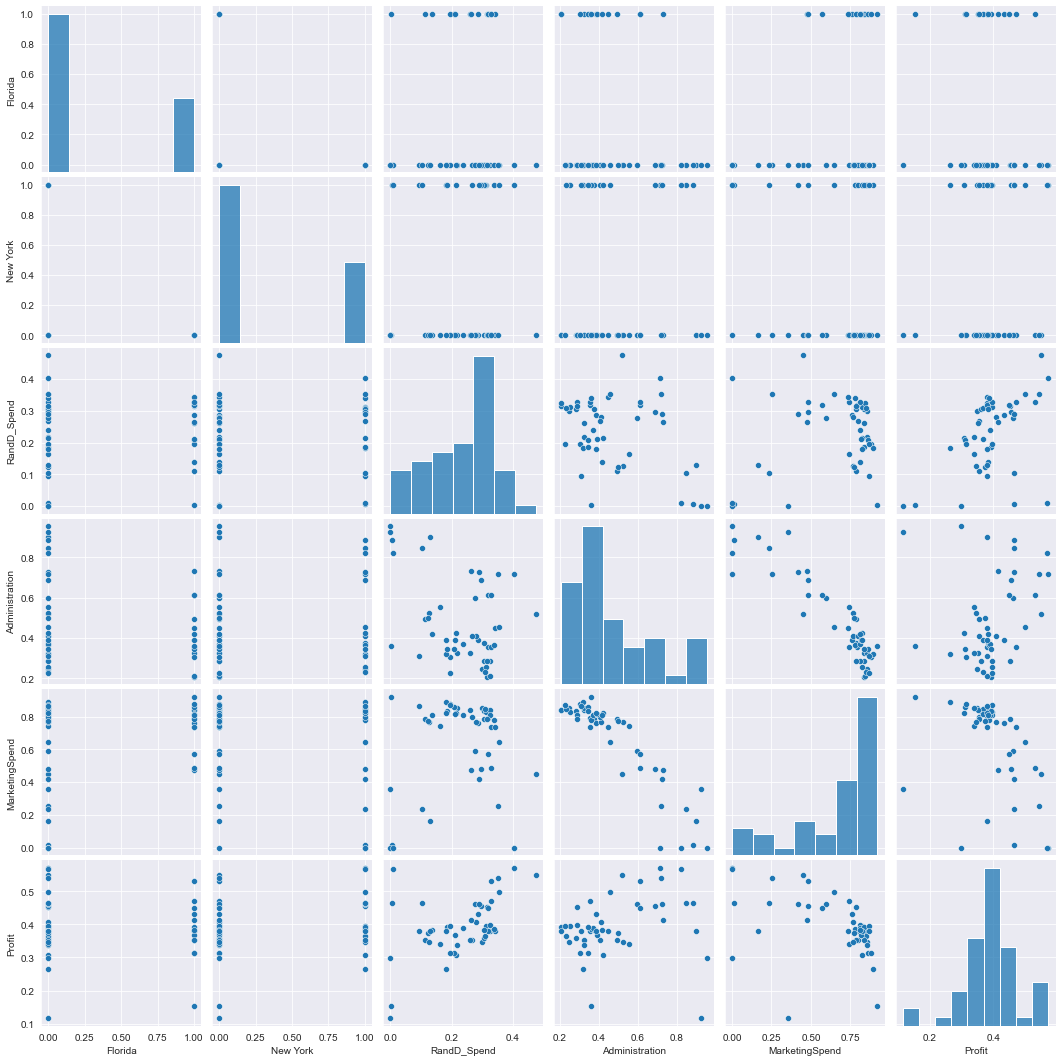

In [123]:
sns.set_style(style='darkgrid')
sns.pairplot(dt_ndata)

In [124]:
data = dt_ndata.rename(columns={"New York":"NY","RandD_Spend":"RDS","MarketingSpend":"MS"})
data.head()

,Florida,NY,RDS,Administration,MS,Profit
0,0,1,0.299093,0.247629,0.853391,0.347775
1,0,0,0.305549,0.284464,0.834161,0.360410
2,1,0,0.315397,0.207903,0.838503,0.392701
3,0,1,0.311201,0.255803,0.826004,0.394254
4,1,0,0.325807,0.209532,0.839508,0.381016


# model building

In [125]:
model4=smf.ols('Profit~Florida+NY+RDS+Administration+MS',data=data).fit()

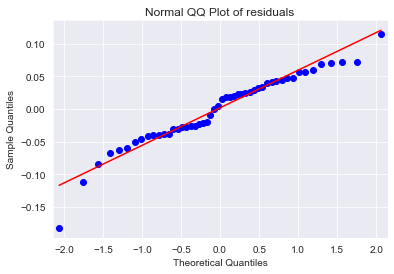

In [126]:
qqplot = sm.qqplot(model4.resid,line = 'q')
plt.title("Normal QQ Plot of residuals")
plt.show()

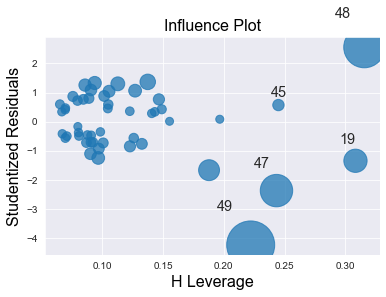

In [127]:
influence_plot(model4)
plt.show()

In [128]:
model_influence = model4.get_influence()
(c,x) = model_influence.cooks_distance

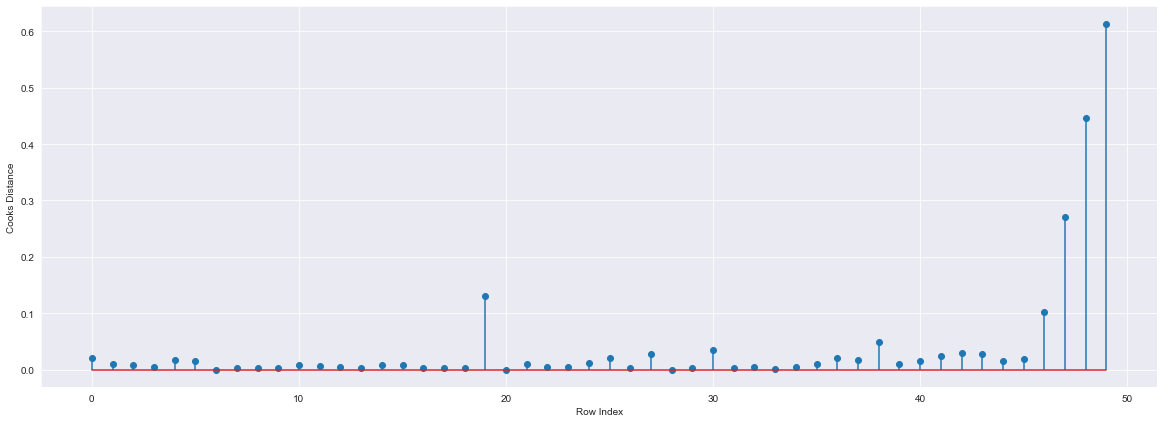

In [130]:
fig = plt.subplots(figsize = (20,7))
plt.stem(np.arange(len(dt)),np.round(c,3))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [131]:
data_new = data.drop(data.index[[47,48,49]],axis=0).reset_index()
data_new = data_new.drop(['index'],axis=1)

# Final Model Building

final_model = smf.ols('Profit~Florida+NY+RDS+Administration+MS',data=data_new).fit()
modelnorm = final_model.rsquared

# Predict for given data

new_data = pd.DataFrame({'Florida':1,'NY':0,'RDS':142107,'Administration':91391.8,'MS':366168},index=[1])
predict4 = final_model.predict(new_data)

In [132]:
modelnorm

0.7397068554087449

In [134]:
predict4

1   -42999.587575
dtype: float64

# using scikit learn

In [135]:
dt_1=pd.read_csv("50_Startups.csv")
dt_1.head()

,RandD_Spend,Administration,MarketingSpend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [136]:
X=dt_1.iloc[:,:-1]
y=dt_1.iloc[:,4]

In [137]:
states=pd.get_dummies(X['State'],drop_first=True)

In [138]:
X = X.drop('State',axis=1)

In [139]:
X=pd.concat([X,states],axis=1)

In [140]:
scale=StandardScaler()
X=scale.fit_transform(X)

In [141]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [142]:
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [143]:
y_pred=regressor.predict(X_test)

In [144]:
score=r2_score(y_test,y_pred)
score

0.9347068473282426

Text(0.5, 1.0, 'Actual vs. Predicted')

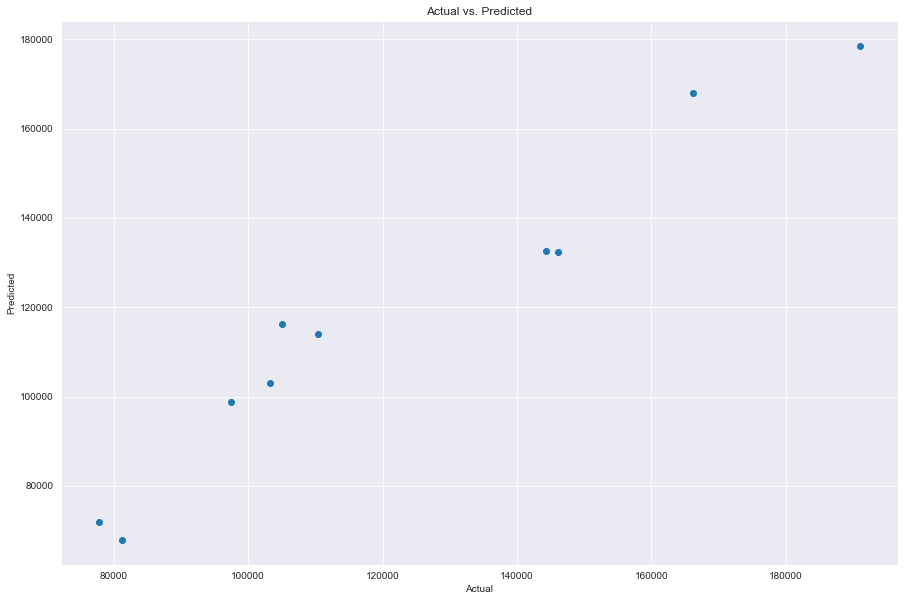

In [145]:
plt.figure(figsize=(15,10))
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')

In [146]:
y_pred1_df=pd.DataFrame({"Actual values":y_test,'Predicted value':y_pred,'Difference':y_test-y_pred})
y_pred1_df[0:20]

,Actual values,Predicted value,Difference
28,103282.38,103015.201598,267.178402
11,144259.40,132582.277608,11677.122392
10,146121.95,132447.738452,13674.211548
41,77798.83,71976.098513,5822.731487
2,191050.39,178537.482211,12512.907789
27,105008.31,116161.242302,-11152.932302
38,81229.06,67851.692097,13377.367903
31,97483.56,98791.733747,-1308.173747
22,110352.25,113969.435330,-3617.185330
4,166187.94,167921.065696,-1733.125696


# Sk Learn with Standard Scaler Transformation 

In [179]:
df = pd.get_dummies(df['State'],drop_first=True)
a.head()

,Florida,New York
0,0,1
1,0,0
2,1,0
3,0,1
4,1,0


In [182]:
b=dt.drop('State',axis=1)
b.head()

,RandD_Spend,Administration,MarketingSpend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [183]:
b.iloc[:,:] = StandardScaler().fit_transform(b.iloc[:,:])
b.head()

,RandD_Spend,Administration,MarketingSpend,Profit
0,2.016411,0.560753,2.153943,2.011203
1,1.955860,1.082807,1.923600,1.999430
2,1.754364,-0.728257,1.626528,1.980842
3,1.554784,-0.096365,1.422210,1.776627
4,1.504937,-1.079919,1.281528,1.357740


In [184]:
c=pd.concat([a,b],axis=1)
c.head()


,Florida,New York,RandD_Spend,Administration,MarketingSpend,Profit
0,0,1,2.016411,0.560753,2.153943,2.011203
1,0,0,1.955860,1.082807,1.923600,1.999430
2,1,0,1.754364,-0.728257,1.626528,1.980842
3,0,1,1.554784,-0.096365,1.422210,1.776627
4,1,0,1.504937,-1.079919,1.281528,1.357740


In [185]:
data = c.rename(columns={"New York":"NY","R&D Spend":"RDS","Marketing Spend":"MS"})
data.head()

,Florida,NY,RandD_Spend,Administration,MarketingSpend,Profit
0,0,1,2.016411,0.560753,2.153943,2.011203
1,0,0,1.955860,1.082807,1.923600,1.999430
2,1,0,1.754364,-0.728257,1.626528,1.980842
3,0,1,1.554784,-0.096365,1.422210,1.776627
4,1,0,1.504937,-1.079919,1.281528,1.357740


In [ ]:
x = data.iloc[:,0:-1]
y = data.iloc[:,-1]

In [186]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 0)

model = LinearRegression()
model.fit(X_train,y_train)
y_pred1 = model.predict(X_test)
y_pred1

array([0.45568627, 0.73258242, 0.75906876, 0.19689837, 0.97016295,
       0.48714675, 0.11278227, 0.32761871, 0.52960953, 0.92871813,
       0.34159155, 0.27365606, 0.53492491, 0.31843876, 0.66511486])

In [187]:
X_test

,Florida,NY,RDS,Administration,MS
28,1,0,0.448980,1.000000,0.224490
11,0,0,0.734694,0.142857,0.551020
10,1,0,0.755102,0.306122,0.530612
41,1,0,0.183673,0.081633,0.346939
2,1,0,0.959184,0.224490,0.959184
27,0,1,0.489796,0.612245,0.877551
38,0,1,0.122449,0.040816,0.408163
31,0,1,0.346939,0.857143,0.163265
22,1,0,0.510204,0.510204,0.775510
4,1,0,0.918367,0.122449,0.918367


In [188]:
r2scorewt1 = r2_score(y_test,y_pred1)
r2scorewt1

0.9697482460452594

# SK Learn with Power Transformer

In [147]:
df = pd.read_csv('50_Startups.csv')

In [148]:
a=pd.get_dummies(df['State'],drop_first=True)
a.head()

,Florida,New York
0,0,1
1,0,0
2,1,0
3,0,1
4,1,0


In [149]:
b=df.drop('State',axis=1)
b.head()

,RandD_Spend,Administration,MarketingSpend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [150]:
pt = PowerTransformer(method='yeo-johnson', standardize=True)
skl_yeojohnson = pt.fit(b)
calc_lambdas = skl_yeojohnson.lambdas_
skl_yeojohnson = pt.transform(b)
df_ptdata = pd.DataFrame(data=skl_yeojohnson, columns=['R&D Spend','Administration','Marketing Spend','Profit'])
df_ptdata.head()

,R&D Spend,Administration,Marketing Spend,Profit
0,1.562570,0.529102,1.580363,1.987125
1,1.527028,1.131285,1.451634,1.975666
2,1.406784,-0.790378,1.279964,1.957572
3,1.284497,-0.174305,1.157809,1.758577
4,1.253427,-1.106257,1.071572,1.349158


In [151]:
df_ptdata=pd.concat([a,df_ptdata],axis=1)
df_ptdata.head()

,Florida,New York,R&D Spend,Administration,Marketing Spend,Profit
0,0,1,1.562570,0.529102,1.580363,1.987125
1,0,0,1.527028,1.131285,1.451634,1.975666
2,1,0,1.406784,-0.790378,1.279964,1.957572
3,0,1,1.284497,-0.174305,1.157809,1.758577
4,1,0,1.253427,-1.106257,1.071572,1.349158


In [ ]:
plt.figure(figsize=(15,10))
plt.scatter(y_test,y_pred1)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')

In [ ]:
y_pred1_df=pd.DataFrame({"Actual values":y_test,'Predicted value':y_pred1,'Difference':y_test-y_pred1})
y_pred1_df[0:20]

In [152]:
data = df_ptdata.rename(columns={"New York":"NY","R&D Spend":"RDS","Marketing Spend":"MS"})
data.head()

,Florida,NY,RDS,Administration,MS,Profit
0,0,1,1.562570,0.529102,1.580363,1.987125
1,0,0,1.527028,1.131285,1.451634,1.975666
2,1,0,1.406784,-0.790378,1.279964,1.957572
3,0,1,1.284497,-0.174305,1.157809,1.758577
4,1,0,1.253427,-1.106257,1.071572,1.349158


In [153]:
x = data.iloc[:,0:-1]
y = data.iloc[:,-1]

# Deciding Train and Test data

X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 0)

model = LinearRegression()
model.fit(X_train,y_train)
y_pred2 = model.predict(X_test)

In [154]:
r2scorewt2 = r2_score(y_test,y_pred2)
r2scorewt2

0.8466151526757891

# SK Learn with Quantile Transformation 

In [155]:
df=pd.read_csv('50_Startups.csv')

In [156]:
a=pd.get_dummies(df['State'],drop_first=True)
a.head()

,Florida,New York
0,0,1
1,0,0
2,1,0
3,0,1
4,1,0


In [157]:
b = df.drop('State',axis=1)
b.head()

,RandD_Spend,Administration,MarketingSpend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [158]:
qt = QuantileTransformer(random_state=0)
qtdf = qt.fit_transform(b)
qtdf = qt.transform(b)
df_qtdata = pd.DataFrame(data=qtdf, columns=['R&D Spend','Administration','Marketing Spend','Profit'])
df_qtdata.head()

C:\Users\Bhavadeep\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2367: UserWarning: n_quantiles (1000) is greater than the total number of samples (50). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


,R&D Spend,Administration,Marketing Spend,Profit
0,1.000000,0.693878,1.000000,1.000000
1,0.979592,0.836735,0.979592,0.979592
2,0.959184,0.224490,0.959184,0.959184
3,0.938776,0.448980,0.938776,0.938776
4,0.918367,0.122449,0.918367,0.918367


In [159]:
df_qtdata = pd.concat([a,df_qtdata],axis=1)
df_qtdata.head()

,Florida,New York,R&D Spend,Administration,Marketing Spend,Profit
0,0,1,1.000000,0.693878,1.000000,1.000000
1,0,0,0.979592,0.836735,0.979592,0.979592
2,1,0,0.959184,0.224490,0.959184,0.959184
3,0,1,0.938776,0.448980,0.938776,0.938776
4,1,0,0.918367,0.122449,0.918367,0.918367


In [160]:
data = df_qtdata.rename(columns={"New York":"NY","R&D Spend":"RDS","Marketing Spend":"MS"})
data.head()

,Florida,NY,RDS,Administration,MS,Profit
0,0,1,1.000000,0.693878,1.000000,1.000000
1,0,0,0.979592,0.836735,0.979592,0.979592
2,1,0,0.959184,0.224490,0.959184,0.959184
3,0,1,0.938776,0.448980,0.938776,0.938776
4,1,0,0.918367,0.122449,0.918367,0.918367


In [161]:

x = data.iloc[:,0:-1]
y = data.iloc[:,-1]

# Deciding Train and Test data

X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 0)

model = LinearRegression()
model.fit(X_train,y_train)
y_pred3 = model.predict(X_test)

In [162]:
y_pred3

array([0.45568627, 0.73258242, 0.75906876, 0.19689837, 0.97016295,
       0.48714675, 0.11278227, 0.32761871, 0.52960953, 0.92871813,
       0.34159155, 0.27365606, 0.53492491, 0.31843876, 0.66511486])

In [163]:
r2scorewt3 = r2_score(y_test,y_pred3)
r2scorewt3

0.9697482460452594

# Sk learn with Normalizer 

In [164]:
df=pd.read_csv('50_Startups.csv')

In [165]:
df.head()

,RandD_Spend,Administration,MarketingSpend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [167]:
a=pd.get_dummies(df['State'],drop_first=True)
a.head()

,Florida,New York
0,0,1
1,0,0
2,1,0
3,0,1
4,1,0


In [168]:
b=df.drop('State',axis=1)
b.head()

,RandD_Spend,Administration,MarketingSpend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [169]:
n = Normalizer()
ndf = n.fit_transform(b)
ndf = n.transform(b)
df_ndata = pd.DataFrame(data=qtdf, columns=['R&D Spend','Administration','Marketing Spend','Profit'])
df_ndata.head()

,R&D Spend,Administration,Marketing Spend,Profit
0,1.000000,0.693878,1.000000,1.000000
1,0.979592,0.836735,0.979592,0.979592
2,0.959184,0.224490,0.959184,0.959184
3,0.938776,0.448980,0.938776,0.938776
4,0.918367,0.122449,0.918367,0.918367


In [170]:
df_ndata = pd.concat([a,df_ndata],axis=1)
df_ndata.head()

,Florida,New York,R&D Spend,Administration,Marketing Spend,Profit
0,0,1,1.000000,0.693878,1.000000,1.000000
1,0,0,0.979592,0.836735,0.979592,0.979592
2,1,0,0.959184,0.224490,0.959184,0.959184
3,0,1,0.938776,0.448980,0.938776,0.938776
4,1,0,0.918367,0.122449,0.918367,0.918367


In [171]:
data = df_ndata.rename(columns={"New York":"NY","R&D Spend":"RDS","Marketing Spend":"MS"})
data.head()

,Florida,NY,RDS,Administration,MS,Profit
0,0,1,1.000000,0.693878,1.000000,1.000000
1,0,0,0.979592,0.836735,0.979592,0.979592
2,1,0,0.959184,0.224490,0.959184,0.959184
3,0,1,0.938776,0.448980,0.938776,0.938776
4,1,0,0.918367,0.122449,0.918367,0.918367


In [172]:
x = data.iloc[:,0:-1]
y = data.iloc[:,-1]

# Deciding Train and Test data

X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 0)

model = LinearRegression()
model.fit(X_train,y_train)
y_pred4 = model.predict(X_test)

In [173]:
r2scorewt4 = r2_score(y_test,y_pred4)
r2scorewt4

0.9697482460452594

In [189]:
Analysis = {'Method':['OLS Without Transformation','OLS with Standard Scaler','OLS with Power Transformation','OLS with Quantile Transformation','OLS with Normalization'],'R-Squared Values':[final_model,finalmodel1,finalmodel2,modelqt,modelnorm],'Predicted Value':[predictwt,predict1,predict2,predict3,predict4]}
Analysis = pd.DataFrame(Analysis)

Analysis1 = {'Method':['Sklearn LR without Transformation','Sklearn LR with Standard Scaler','Sklearn LR with Power Transformation','Sklearn LR with Quantile Transformation','Sklearn LR with Normalization'],'R-Squared Values':[score,r2scorewt1,r2scorewt2,r2scorewt3,r2scorewt4],'Predicted Values':[y_pred,y_pred1,y_pred2,y_pred3,y_pred4]}
Analysis1 = pd.DataFrame(Analysis1)

TotalAnalysis = pd.concat([Analysis,Analysis1],axis=1)
TotalAnalysis

,Method,R-Squared Values,Predicted Value,Method,R-Squared Values,Predicted Values
0,OLS Without Transformation,<statsmodels.regression.linear_model.Regressio...,1 171811.495683 dtype: float64,Sklearn LR without Transformation,0.934707,"[103015.20159796179, 132582.27760815568, 13244..."
1,OLS with Standard Scaler,0.962997,1 153253.009644 dtype: float64,Sklearn LR with Standard Scaler,0.969748,"[0.4556862696132795, 0.7325824239365348, 0.759..."
2,OLS with Power Transformation,0.937258,1 162243.625986 dtype: float64,Sklearn LR with Power Transformation,0.846615,"[0.05415379903789861, 0.5186501226039854, 0.54..."
3,OLS with Quantile Transformation,0.985893,1 152003.812286 dtype: float64,Sklearn LR with Quantile Transformation,0.969748,"[0.4556862696132795, 0.7325824239365348, 0.759..."
4,OLS with Normalization,0.739707,1 -42999.587575 dtype: float64,Sklearn LR with Normalization,0.969748,"[0.4556862696132795, 0.7325824239365348, 0.759..."
